# Part1. Data import and preliminary analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv',nrows=5000000)
test = pd.read_csv('test.csv')
test_ids = test['key']

train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 305.2+ MB


In [3]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.000000e+06,5.000000e+06,5.000000e+06,4.999964e+06,4.999964e+06,5.000000e+06
mean,1.134080e+01,-7.250678e+01,3.991974e+01,-7.250652e+01,3.991725e+01,1.684695e+00
std,9.820175e+00,1.280970e+01,8.963509e+00,1.284777e+01,9.486767e+00,1.331854e+00
min,-1.000000e+02,-3.426609e+03,-3.488080e+03,-3.412653e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399206e+01,4.073491e+01,-7.399139e+01,4.073404e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396711e+01,4.076711e+01,-7.396367e+01,4.076811e+01,2.000000e+00
max,1.273310e+03,3.439426e+03,3.310364e+03,3.457622e+03,3.345917e+03,2.080000e+02


Outliers: negative prices, minimum number of passengers 0, maximum number of passengers 208

# Part2. Data Analysis

First look at the distribution of price characteristics

Text(0, 0.5, 'Frequency')

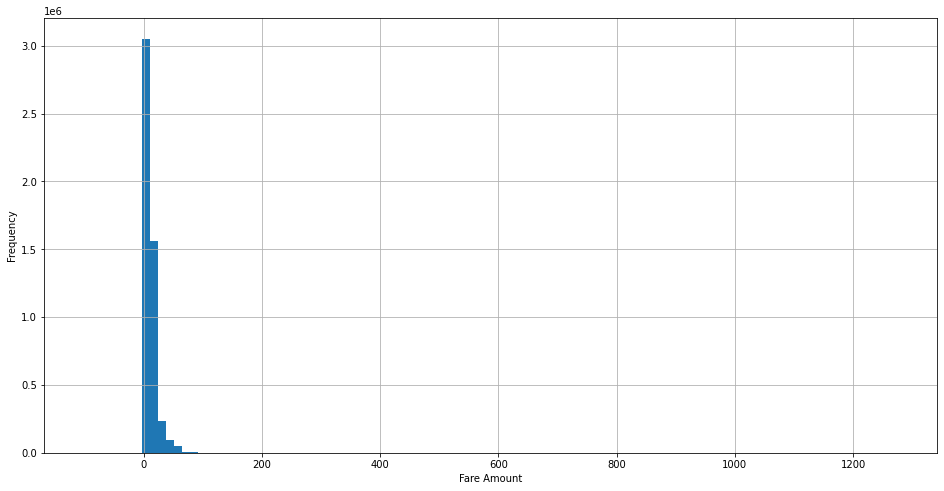

In [4]:
train.fare_amount.hist(bins=100,figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

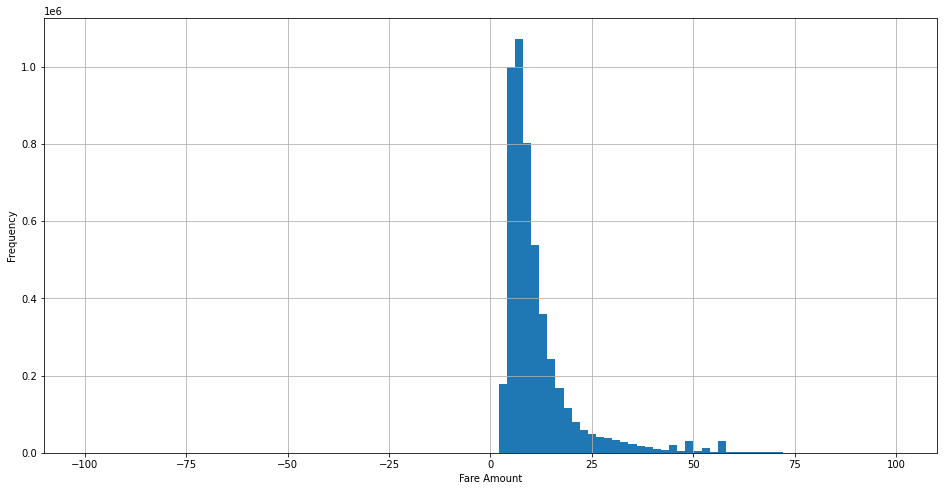

In [5]:
train[train.fare_amount <100 ].fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

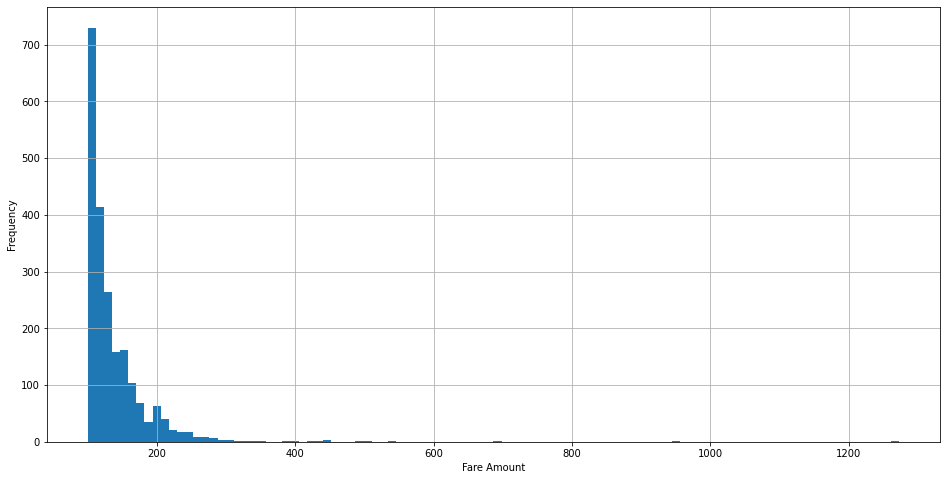

In [6]:
train[train.fare_amount >=100 ].fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

In [8]:
train[train.fare_amount <100].shape

(4997855, 8)

In [9]:
train[train.fare_amount >=100].shape

(2145, 8)

Conclusion:
1. Most of the price distribution is within 100, and a small part is above 100

2. Prices within 100 are mostly concentrated between 0 and 20

3. Prices beyond 100 are mostly concentrated around 200, and a few relatively large prices may be outliers or prices to the airport.

Observe the distribution of the number of passengers:

Text(0, 0.5, 'Frequency')

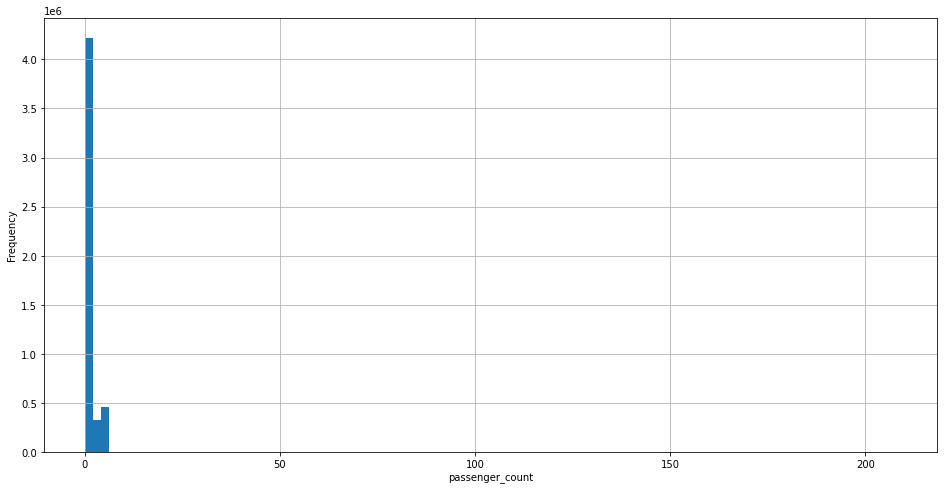

In [10]:
train.passenger_count.hist(bins=100,figsize = (16,8))
plt.xlabel("passenger_count")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

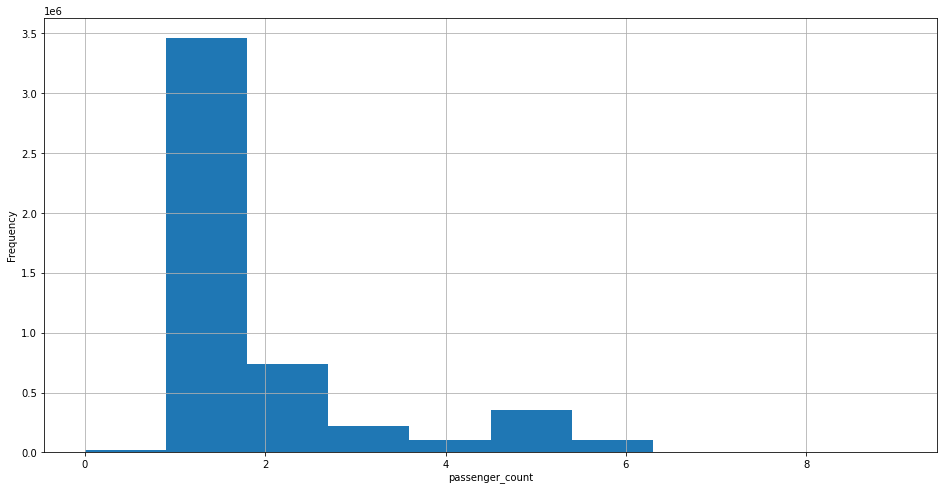

In [11]:
train[train.passenger_count<10].passenger_count.hist(bins=10,figsize = (16,8))
plt.xlabel("passenger_count")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

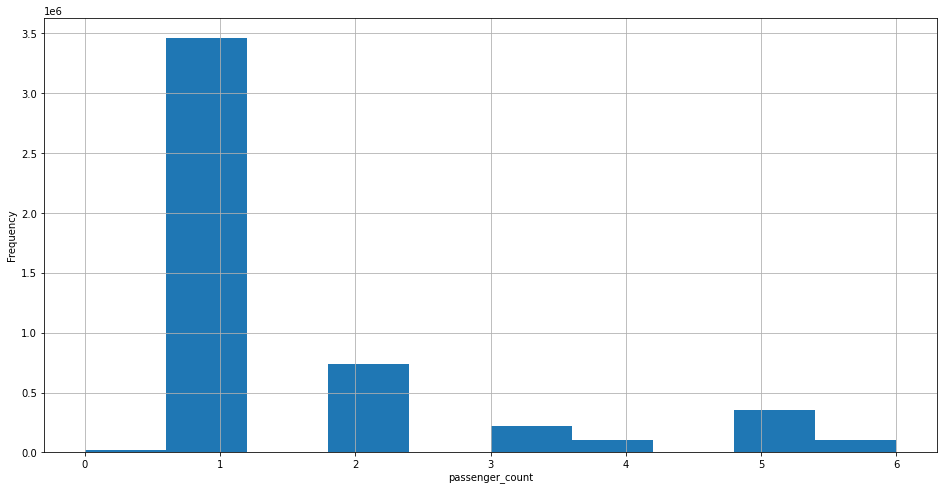

In [12]:
train[train.passenger_count<7].passenger_count.hist(bins=10,figsize = (16,8))
plt.xlabel("passenger_count")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

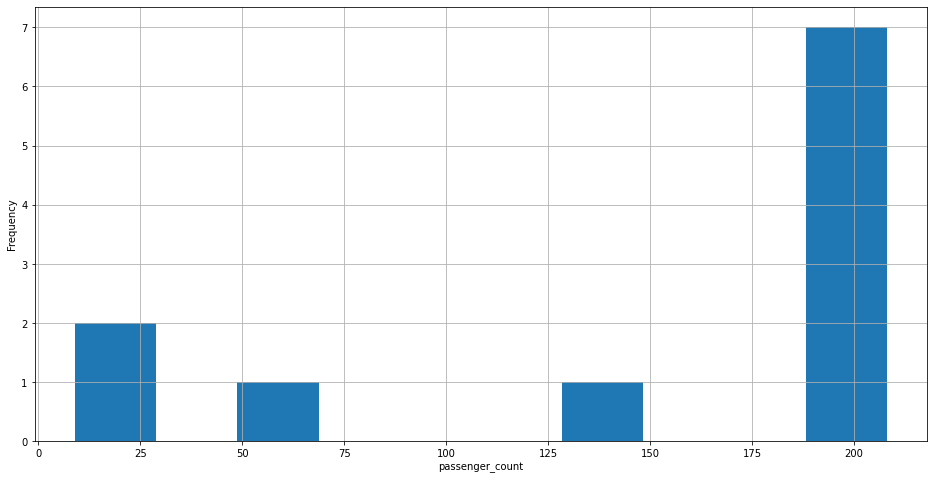

In [13]:
train[train.passenger_count>7].passenger_count.hist(bins=10,figsize = (16,8))
plt.xlabel("passenger_count")
plt.ylabel("Frequency")

In [14]:
train[train.passenger_count >7]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
929022,2009-07-30 11:54:00.000000193,3.30,2009-07-30 11:54:00 UTC,0.000000,0.000000,0.000000,0.000000,208
1007609,2014-06-24 15:13:00.00000040,104.00,2014-06-24 15:13:00 UTC,-74.015780,40.715420,-74.170280,40.708340,9
2154045,2010-12-16 11:21:00.000000209,3.30,2010-12-16 11:21:00 UTC,0.000000,0.000000,0.000000,0.000000,208
2198549,2010-12-15 14:20:00.00000010,3.30,2010-12-15 14:20:00 UTC,0.000000,0.000000,0.000000,0.000000,208
2910347,2010-12-16 06:44:00.00000039,4.50,2010-12-16 06:44:00 UTC,0.000000,0.000000,0.000000,0.000000,208
3107489,2009-05-12 14:50:00.000000175,2.70,2009-05-12 14:50:00 UTC,-73.937818,40.758260,-73.937827,40.758250,208
3323791,2011-08-27 01:24:00.000000168,8.50,2011-08-27 01:24:00 UTC,-73.987858,40.760340,-74.000682,40.752413,129
4095440,2015-06-14 08:56:16.0000001,37.04,2015-06-14 08:56:16 UTC,-73.982094,40.756252,-73.872482,40.774506,9
4103745,2010-12-22 12:11:00.000000230,23.70,2010-12-22 12:11:00 UTC,0.000000,0.000000,0.000000,0.000000,208
4432483,2009-05-11 13:56:00.00000088,11.10,2009-05-11 13:56:00 UTC,-73.937733,40.758267,-73.937737,40.758273,208


In [15]:
train[train.passenger_count ==0].shape

(17639, 8)

<AxesSubplot:xlabel='passenger_count', ylabel='fare_amount'>

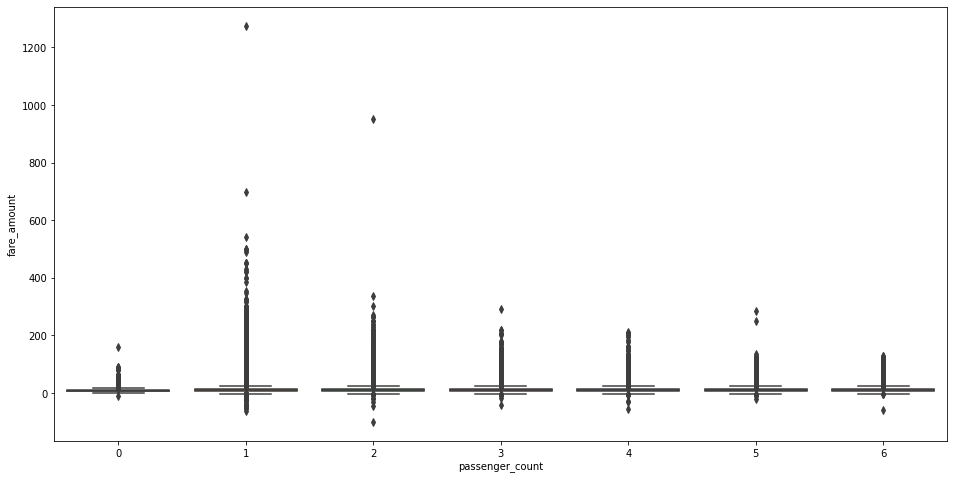

In [16]:
plt.figure(figsize= (16,8))
sns.boxplot(x = train[train.passenger_count< 7].passenger_count, y = train.fare_amount)

In [17]:
train[train.passenger_count <7][['fare_amount','passenger_count']].corr()

,fare_amount,passenger_count
fare_amount,1.000000,0.013199
passenger_count,0.013199,1.000000


Conclusion:
1. The distribution of the number of people is mostly within 7 and a small part is outside 7

2. Most of the data coordinates in the data with the number of people other than 7 are missing and the number of people is 208

3. There are 17,639 data that the number of passengers is 0, it may be a taxi that transports goods, or it may be missing data

4. It can be seen from the box chart that the average price of taxis with fewer than 7 people is relatively close

5. Use the .corr() interface to check the correlation between passenger_count and fare_amount is not high, only 0.013

# Part3. Data processing

1. Null value processing

In [18]:
train.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    36
dropoff_latitude     36
passenger_count       0
dtype: int64

In [19]:
# just drop them
train = train.dropna(how='any', axis=0)

In [20]:
test = pd.read_csv('test.csv')
test_ids = test['key']
test.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

2. Outlier processing

In [21]:
#Remove data with negative prices
train = train[train.fare_amount>=0]

3. Feature engineering

① Shorten the scope of the training set

Since the amount of data in the training set is relatively large, we can reduce the training set to a certain extent according to the coordinate range of the test set

In [22]:
print(min(test.pickup_longitude.min(),test.dropoff_longitude.min()))
print(max(test.pickup_longitude.max(),test.dropoff_longitude.max()))
print(min(test.pickup_latitude.min(),test.dropoff_latitude.min()))
print(max(test.pickup_latitude.max(),test.dropoff_latitude.max()))

-74.263242
-72.986532
40.568973
41.709555


-74.2 to -73 as the longitude selection range, 40.5 to 41.8 as the latitude selection range

In [23]:
def select_train(df, fw):
    return (df.pickup_longitude >= fw[0]) & (df.pickup_longitude <= fw[1]) & \
           (df.pickup_latitude >= fw[2]) & (df.pickup_latitude <= fw[3]) & \
           (df.dropoff_longitude >= fw[0]) & (df.dropoff_longitude <= fw[1]) & \
           (df.dropoff_latitude >= fw[2]) & (df.dropoff_latitude <= fw[3])
fw = (-74.2, -73, 40.5, 41.8)
train = train[select_train(train, fw)]

②Construct new time characteristics

The original time feature is not suitable for our direct use. Considering that taxi prices may increase in different time periods, years and months, we should extract New Year, month, day and hour from the original time feature as new features for our model to use

In [24]:
def deal_time_features(df):
    df['pickup_datetime'] = df['pickup_datetime'].str.slice(0, 16)
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], utc=True, format='%Y-%m-%d %H:%M')
    df['hour'] = df.pickup_datetime.dt.hour
    df['month'] = df.pickup_datetime.dt.month
    df["year"] = df.pickup_datetime.dt.year
    df["weekday"] = df.pickup_datetime.dt.weekday
    return df
train = deal_time_features(train)
test = deal_time_features(test)

In [25]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,month,year,weekday
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:00+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,6,2009,0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:00+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,1,2010,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,8,2011,3
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:00+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,4,2012,5
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,3,2010,1


The time characteristics after processing are composed of time, month, year and week

③Construct a new distance feature

Using the latitude and longitude coordinates directly is not conducive to the operation of our model. We use the conversion formula to convert the latitude and longitude coordinates into distance

In [26]:
def distance(x1, y1, x2, y2):
    p = 0.017453292519943295 
    a = 0.5 - np.cos((x2 - x1) * p)/2 + np.cos(x1 * p) * np.cos(x2 * p) * (1 - np.cos((y2 - y1) * p)) / 2
    dis = 0.6213712 * 12742 * np.arcsin(np.sqrt(a))
    return dis  
train['distance_miles'] = distance(train.pickup_latitude,train.pickup_longitude,train.dropoff_latitude,train.dropoff_longitude)
test['distance_miles'] = distance(test.pickup_latitude, test.pickup_longitude,test.dropoff_latitude,test.dropoff_longitude)
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,month,year,weekday,distance_miles
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:00+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,6,2009,0,0.640487
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:00+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,1,2010,1,5.250670
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,8,2011,3,0.863411
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:00+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,4,2012,5,1.739386
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,3,2010,1,1.242218


In [27]:
train[(train['distance_miles']==0)&(train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,month,year,weekday,distance_miles
331597,2013-08-05 06:45:54.0000005,0.0,2013-08-05 06:45:00+00:00,-73.982354,40.679971,-73.982354,40.679971,1,6,8,2013,0,0.0
436658,2015-03-04 22:33:39.0000008,0.0,2015-03-04 22:33:00+00:00,-74.043442,40.788208,-74.043442,40.788208,1,22,3,2015,2,0.0
689250,2015-05-27 23:10:03.0000004,0.0,2015-05-27 23:10:00+00:00,-73.994125,40.741131,-73.994125,40.741131,1,23,5,2015,2,0.0
1662545,2010-03-13 02:39:29.0000001,0.0,2010-03-13 02:39:00+00:00,-74.035278,40.738683,-74.035278,40.738683,2,2,3,2010,5,0.0
2214498,2010-02-03 11:44:07.0000002,0.0,2010-02-03 11:44:00+00:00,-74.014147,40.710546,-74.014147,40.710546,1,11,2,2010,2,0.0
2329503,2015-02-19 09:43:11.0000007,0.0,2015-02-19 09:43:00+00:00,-73.953857,40.813251,-73.953857,40.813251,1,9,2,2015,3,0.0
2581417,2015-05-07 19:12:43.0000005,0.0,2015-05-07 19:12:00+00:00,-73.913727,40.779018,-73.913727,40.779018,1,19,5,2015,3,0.0
3070651,2015-01-25 20:54:02.0000004,0.0,2015-01-25 20:54:00+00:00,-73.981293,40.769012,-73.981293,40.769012,1,20,1,2015,6,0.0
3252539,2015-01-14 10:15:51.0000002,0.0,2015-01-14 10:15:00+00:00,-73.937508,40.758129,-73.937508,40.758129,1,10,1,2015,2,0.0
3712453,2010-03-29 12:47:22.0000005,0.0,2010-03-29 12:47:00+00:00,-73.836776,40.869879,-73.836776,40.869879,1,12,3,2010,0,0.0


There are some useless data with distance and price of 0 that can be deleted

In [28]:
train = train.drop(index= train[(train['distance_miles']==0)&(train['fare_amount']==0)].index, axis=0)

④Special treatment

1. Delete the data whose fare_amount is less than 2.5, because the starting price of New York taxis is $2.5

In [29]:
train = train.drop(index= train[train['fare_amount'] < 2.5].index, axis=0)

2. Remove data with more than 7 people

In [31]:
train = train.drop(index= train[train.passenger_count >= 7].index, axis=0)

# Part4. Data Modeling

In [32]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,4892420.0,11.312971,9.638960,2.500000,6.000000,8.500000,12.500000,952.000000
pickup_longitude,4892420.0,-73.975100,0.038247,-74.199930,-73.992266,-73.982098,-73.968328,-73.011752
pickup_latitude,4892420.0,40.751090,0.029507,40.500247,40.736565,40.753360,40.767544,41.696852
dropoff_longitude,4892420.0,-73.974230,0.037324,-74.199810,-73.991573,-73.980605,-73.965352,-73.011777
dropoff_latitude,4892420.0,40.751462,0.032694,40.500287,40.735613,40.753866,40.768405,41.691258
passenger_count,4892420.0,1.684419,1.307596,0.000000,1.000000,1.000000,2.000000,6.000000
hour,4892420.0,13.511185,6.514870,0.000000,9.000000,14.000000,19.000000,23.000000
month,4892420.0,6.268705,3.436544,1.000000,3.000000,6.000000,9.000000,12.000000
year,4892420.0,2011.736353,1.863041,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000
weekday,4892420.0,3.041595,1.949410,0.000000,1.000000,3.000000,5.000000,6.000000


Use the.corr interface to see how these new features relate to price

In [33]:
train.corr()['fare_amount']

fare_amount          1.000000
pickup_longitude     0.388246
pickup_latitude     -0.191144
dropoff_longitude    0.297366
dropoff_latitude    -0.153060
passenger_count      0.014463
hour                -0.017195
month                0.024744
year                 0.116739
weekday              0.003193
distance_miles       0.821040
Name: fare_amount, dtype: float64

In [35]:
df_train = train.drop(columns= ['key','pickup_datetime'], axis= 1).copy()
df_test = test.drop(columns= ['key','pickup_datetime'], axis= 1).copy()
#The copied data is used for modeling


from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('fare_amount',axis=1)
                                                    ,df_train['fare_amount']
                                                    ,test_size=0.2
                                                    ,random_state = 42)



import xgboost as xgb
params = { 
    'max_depth': 7,
    'gamma' :0,
    'eta':0.3, 
    'subsample': 1,
    'colsample_bytree': 0.9, 
    'objective':'reg:linear',
    'eval_metric':'rmse',
    'silent': 0
}
def XGBmodel(X_train,X_test,y_train,y_test,params):
    matrix_train = xgb.DMatrix(X_train,label=y_train)
    matrix_test = xgb.DMatrix(X_test,label=y_test)
    model=xgb.train(params=params,
                    dtrain=matrix_train,
                    num_boost_round=5000, 
                    early_stopping_rounds=10,
                    evals=[(matrix_test,'test')])
    return model

model = XGBmodel(X_train,X_test,y_train,y_test,params)


[19:27:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	test-rmse:10.53876
[1]	test-rmse:8.08184
[2]	test-rmse:6.34169
[3]	test-rmse:5.25942
[4]	test-rmse:4.62591
[5]	test-rmse:4.26787
[6]	test-rmse:4.06781
[7]	test-rmse:3.95366
[8]	test-rmse:3.89145
[9]	test-rmse:3.83950
[10]	test-rmse:3.80946
[11]	test-rmse:3.78975
[12]	test-rmse:3.77556
[13]	test-rmse:3.76106
[14]	test-rmse:3.74642
[15]	test-rmse:3.74033
[16]	test-rmse:3.73627
[17]	test-rmse:3.72949
[18]	test-rmse:3.71861
[19]	test

In [36]:
prediction = model.predict(xgb.DMatrix(df_test), ntree_limit = model.best_ntree_limit)
prediction

d:\program files\python39\lib\site-packages\xgboost\core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


array([ 9.460388, 10.778619,  4.786408, ..., 53.115017, 18.643826,
        6.759039], dtype=float32)

In [37]:
res = pd.DataFrame()
res['key'] = test_ids
res['fare_amount'] = prediction
res.to_csv('submission.csv', index=False)